In [28]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn

%matplotlib inline

In [29]:
df1 = pd.read_csv('creditcard.csv')
df = pd.DataFrame(df1)

In [50]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
df['Class'] = df['Class'].replace("'0'", 'Cero')
df['Class'] = df['Class'].replace("'1'", 'Uno')

In [31]:
df['Class'] = df['Class'].replace('Cero', 0)
df['Class'] = df['Class'].replace('Uno', 1)

In [32]:
df['Class']=df['Class'].astype('int')

In [33]:
df.head(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,128.0,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,-0.746625,1.563459,0.890132,-0.985159,0.778734,1.016974,-0.429490,-0.335787,0.614690,0.703133,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
196,130.0,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,0.055911,1.265311,0.521277,-0.830439,0.157455,-0.365075,-1.142187,0.409601,-0.204876,1.010483,0.089378,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0
197,130.0,1.353283,-0.694900,0.970826,-0.426559,-1.417263,-0.505710,-0.932069,-0.083957,-0.224208,0.446748,-0.540412,0.072338,1.006647,-0.905357,-0.304202,0.802626,0.483087,-1.344930,0.649045,0.126358,0.284341,0.993434,-0.164893,0.474257,0.623848,-0.006750,0.046026,0.022043,15.93,0
198,131.0,-1.007391,1.261943,1.207203,1.307575,0.153211,0.062291,0.508647,0.079447,-0.395211,-0.006152,-0.468288,0.827819,1.046676,-0.185213,0.109267,-1.252804,0.605941,-0.831080,0.772721,-0.104067,0.039150,0.411661,-0.080320,0.121235,-0.133000,-0.303177,-0.463913,-0.164157,10.00,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


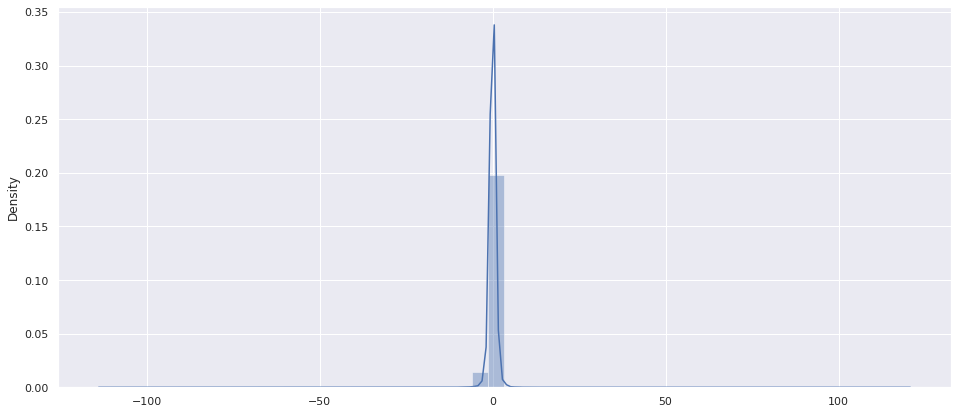

In [27]:
fig, ax= plt.subplots(figsize=(16,7))
sns.distplot(df.iloc[:,1:-2])


In [36]:
jx = df.iloc[:,1:-2]
jy = df.iloc[:,-1]
print(jx.shape)
print(jy.shape)

(284807, 28)
(284807,)


In [37]:
ceros = jy[jy==0].count()
unos = jy[jy==1].count()

ceros, unos

(284315, 492)

In [38]:
from sklearn.model_selection import  train_test_split

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(jx, jy, test_size=0.3, random_state=1)

In [40]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
191125,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,-0.646900,-0.282785,0.023241,-0.421092,0.368247,-0.158465,-0.334756,-0.337180,-0.842032,-0.033013,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199
153710,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,-1.221469,1.659649,-2.785047,0.373031,0.959813,-0.781750,0.471617,0.757110,1.553497,-0.480573,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814
261216,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,-0.199536,0.644008,0.509291,-0.247527,-0.614734,-0.425518,0.668894,0.064331,0.384197,0.527165,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179
190724,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,-0.277888,0.910986,0.055726,-1.178182,-0.318203,0.394330,0.489917,0.148204,1.153798,-0.083757,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441
127492,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,-0.109470,0.906279,0.705060,0.569520,0.457899,1.289436,0.327637,-0.204127,1.013530,1.765153,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)


In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [43]:
y_pred = model.predict(X_test)

In [44]:
comp = pd.DataFrame({'real': y_test,'predicción': y_pred})

In [45]:
comp.head(10)

,real,predicción
169876,0,0
127467,0,0
137900,0,0
21513,0,0
134700,0,0
196117,0,0
24533,0,0
13629,0,0
246673,0,0
91842,0,0


In [46]:
from sklearn.metrics import  accuracy_score

In [52]:
acc = accuracy_score(y_test, y_pred)
acc

0.9991105181231933

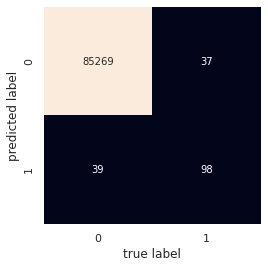

In [53]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.73      0.72      0.72       137

    accuracy                           1.00     85443
   macro avg       0.86      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Hacerlo con el RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [62]:
y_preds = rf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_score(y_test, y_preds) *100

99.95084442259751

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85330
           1       0.76      0.91      0.83       113

    accuracy                           1.00     85443
   macro avg       0.88      0.96      0.92     85443
weighted avg       1.00      1.00      1.00     85443

